In [28]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [29]:
experiment_sub_dir = "2025Apr27-221039_configs"
exp_path = os.path.join(r"D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
       'sub_experiment_path', 'seed', 'experiment_name'],
      dtype='object')

In [30]:
df

,epoch_type,frame_stamp,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,episode_discounted_rewards_mean,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_experiment_path,seed,experiment_name
0,training,200000,-19.471932,3.995341e-01,-0.118851,-0.120000,0.106232,-10.018190,3.995341e-01,-0.118804,...,-21561.791961,-0.348615,6.135523e+06,24374.0,48.0,0 days 00:03:41.502475,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
1,training,400000,-0.240000,-9.992007e-16,-0.115849,-0.120000,0.094478,-0.240000,-9.992007e-16,-0.115849,...,-1010.808482,-0.205284,3.455478e+05,25000.0,48.0,0 days 00:03:24.409557,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
2,training,600000,-0.240000,-9.992007e-16,-0.110245,-0.120000,0.093813,-0.240000,-9.992007e-16,-0.110245,...,-1.380503,-0.176770,3.332549e+02,25000.0,48.0,0 days 00:03:31.058698,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
3,training,800000,-0.240000,-9.992007e-16,-0.102922,-0.120000,0.093351,-0.240000,-9.992007e-16,-0.102922,...,-0.331972,-0.177302,4.772161e-01,25000.0,48.0,0 days 00:03:37.229814,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
4,training,1000000,-0.240000,-9.992007e-16,-0.094061,-0.120000,0.093004,-0.240000,-9.992007e-16,-0.094061,...,-0.312184,-0.173259,4.827671e-01,25000.0,56.0,0 days 00:04:00.191815,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,validation,3200000,-317.471927,-3.174719e+02,-317.471927,-317.471927,0.000000,-32.420891,-3.242089e+01,-32.420891,...,-0.001401,-0.001393,2.473185e-05,NaN,NaN,0 days 00:00:00.432775,0.9,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0004_agent_params.args_.action_w_noise_amplitu...
196,validation,3400000,-317.471927,-3.174719e+02,-317.471927,-317.471927,0.000000,-32.420891,-3.242089e+01,-32.420891,...,-0.000611,-0.000614,8.281496e-06,NaN,NaN,0 days 00:00:00.438434,0.9,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0004_agent_params.args_.action_w_noise_amplitu...
197,validation,3600000,-317.471927,-3.096475e+02,-316.689481,-317.471927,2.347338,-32.420891,-3.242042e+01,-32.420843,...,-0.000270,-0.000035,7.888137e-03,NaN,NaN,0 days 00:00:00.419267,0.9,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0004_agent_params.args_.action_w_noise_amplitu...
198,validation,3800000,-317.471927,-3.174719e+02,-317.471927,-317.471927,0.000000,-32.420891,-3.242089e+01,-32.420891,...,0.000289,0.000295,2.483448e-05,NaN,NaN,0 days 00:00:00.404152,0.9,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0004_agent_params.args_.action_w_noise_amplitu...


In [31]:
df[df['epoch_type'] == 'validation']

,epoch_type,frame_stamp,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,episode_discounted_rewards_mean,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_experiment_path,seed,experiment_name
20,validation,200000,-103.314517,-103.314517,-103.314517,-103.314517,0.000000e+00,-19.863286,-19.863286,-19.863286,...,-0.187365,-0.188584,0.002706,NaN,NaN,0 days 00:00:00.495103,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
21,validation,400000,-150.597079,-150.597079,-150.597079,-150.597079,0.000000e+00,-21.204748,-21.204748,-21.204748,...,-0.160583,-0.162061,0.003266,NaN,NaN,0 days 00:00:00.634261,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
22,validation,600000,-183.862382,-158.631448,-180.835973,-183.862382,7.552093e+00,-22.944157,-22.645563,-22.914159,...,-0.164879,-0.165888,0.012157,NaN,NaN,0 days 00:00:00.487917,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
23,validation,800000,-211.341063,-211.341063,-211.341063,-211.341063,2.842171e-14,-24.461674,-24.461674,-24.461674,...,-0.165575,-0.165468,0.002635,NaN,NaN,0 days 00:00:00.589711,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
24,validation,1000000,-227.637013,-227.637013,-227.637013,-227.637013,0.000000e+00,-25.919325,-25.919325,-25.919325,...,-0.154502,-0.153017,0.004967,NaN,NaN,0 days 00:00:00.638928,0,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.action_w_noise_amplitu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,validation,3200000,-317.471927,-317.471927,-317.471927,-317.471927,0.000000e+00,-32.420891,-32.420891,-32.420891,...,-0.001401,-0.001393,0.000025,NaN,NaN,0 days 00:00:00.432775,0.9,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0004_agent_params.args_.action_w_noise_amplitu...
196,validation,3400000,-317.471927,-317.471927,-317.471927,-317.471927,0.000000e+00,-32.420891,-32.420891,-32.420891,...,-0.000611,-0.000614,0.000008,NaN,NaN,0 days 00:00:00.438434,0.9,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0004_agent_params.args_.action_w_noise_amplitu...
197,validation,3600000,-317.471927,-309.647469,-316.689481,-317.471927,2.347338e+00,-32.420891,-32.420416,-32.420843,...,-0.000270,-0.000035,0.007888,NaN,NaN,0 days 00:00:00.419267,0.9,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0004_agent_params.args_.action_w_noise_amplitu...
198,validation,3800000,-317.471927,-317.471927,-317.471927,-317.471927,0.000000e+00,-32.420891,-32.420891,-32.420891,...,0.000289,0.000295,0.000025,NaN,NaN,0 days 00:00:00.404152,0.9,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0004_agent_params.args_.action_w_noise_amplitu...


In [32]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_agent_params.args_.action_w_noise_amplitude    0
Name: 0, dtype: object
Best mean reward: -112.54950600754167


In [33]:
averaged_results

,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,episode_rewards_mean,sub_experiment_path
0,0,-112.549506,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,0.1,-158.102757,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
2,0.3,-123.491688,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
3,0.6,-131.358425,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
4,0.9,-129.966930,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


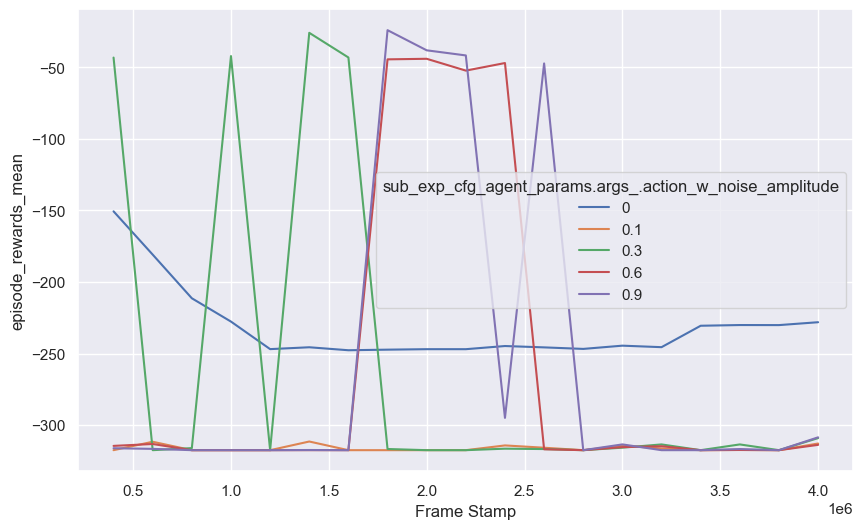

In [34]:
selected_metric = 'episode_rewards_mean'
hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# Filter for validation episodes
validation_df = df[df['epoch_type'] == 'validation']

# Get the unique sorted frame_stamp values
unique_frames = np.sort(validation_df['frame_stamp'].unique())
N = 1
# Get all frame_stamp values after the first N unique ones
filtered_frames = unique_frames[N:]

# Filter the DataFrame to only include rows with these frame_stamp values
filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.show()

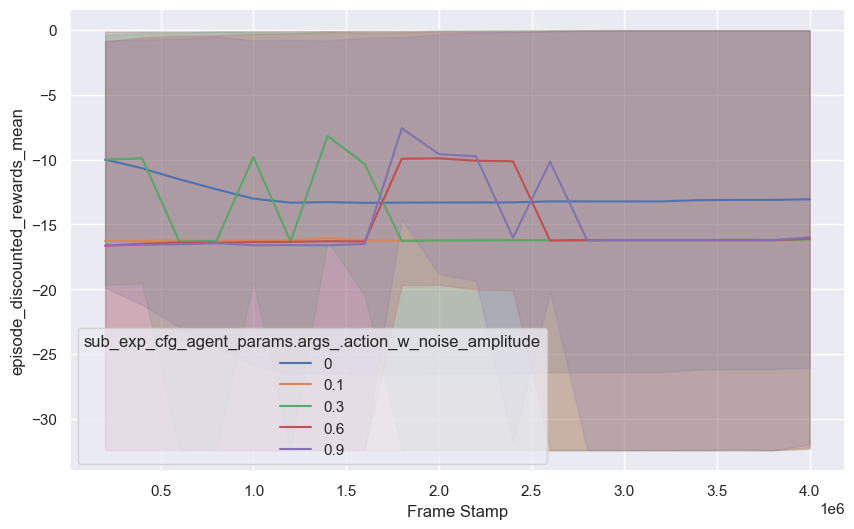

In [35]:

selected_metric = 'episode_discounted_rewards_mean'
hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

validation_df = df[df['epoch_type'] == 'validation']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue=hue_col)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [36]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude
39,validation,4000000,-228.070250,100.0,-26.068342,NaN,NaN,0 days 00:00:00.396720,0,0000_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0
79,validation,4000000,-312.821752,100.0,-32.319569,NaN,NaN,0 days 00:00:00.443992,0,0001_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.1
119,validation,4000000,-309.040625,100.0,-32.311370,NaN,NaN,0 days 00:00:00.408726,0,0002_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.3
159,validation,4000000,-313.762902,100.0,-32.207238,NaN,NaN,0 days 00:00:00.469660,0,0003_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.6
199,validation,4000000,-308.497848,100.0,-31.985603,NaN,NaN,0 days 00:00:00.435832,0,0004_agent_params.args_.action_w_noise_amplitu...,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.9


In [37]:
# Print the experiment_name of the row with the highest episode_rewards_mean 
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['experiment_name'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['episode_rewards_mean'].values[0])


D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025Apr27-221039_configs\0000_agent_params.args_.action_w_noise_amplitude_0\0


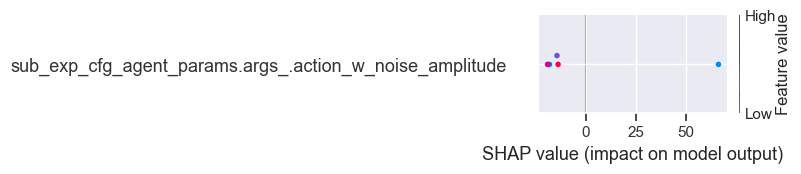

In [38]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [39]:
hyperparam_columns

['sub_exp_cfg_agent_params.args_.action_w_noise_amplitude']

In [40]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()


IndexError: list index out of range